## Medical_Cost_Regreession_Problem

Predicting the medical cost based on som independent variables using the [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv) dataset from Kaggle

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Preparation

In [5]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [6]:
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

### Converting some columns in one_hot_encoded_vects
* **sex** - should be converted to number
* **smoker column** - should be converted to one hot encording
* **region** - should be converted to one hot 

In [12]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Target and features extraction

In [14]:
y = data_one_hot['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [19]:
X = data_one_hot.drop(['charges'], axis=1).values
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

> Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X.shape

(1338, 11)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size= .2)

X_train.shape, X_test.shape, y_test.shape, y_train.shape

((1070, 11), (268, 11), (268,), (1070,))

> Converting numpy array to tensors

In [26]:
X_train_tensors = tf.cast(tf.convert_to_tensor(X_train), dtype=tf.float32)
X_test_tensors = tf.cast(tf.convert_to_tensor(X_test), dtype=tf.float32)

y_train_tensors = tf.cast(tf.convert_to_tensor(y_train), dtype=tf.float32)
y_test_tensors = tf.cast(tf.convert_to_tensor(y_test), dtype=tf.float32)

X_train_tensors, y_train_tensors

(<tf.Tensor: shape=(1070, 11), dtype=float32, numpy=
 array([[38.   , 30.21 ,  3.   , ...,  1.   ,  0.   ,  0.   ],
        [54.   , 39.6  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [39.   , 32.8  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
        ...,
        [52.   , 30.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [19.   , 37.43 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
        [55.   , 35.245,  1.   , ...,  0.   ,  0.   ,  0.   ]],
       dtype=float32)>, <tf.Tensor: shape=(1070,), dtype=float32, numpy=
 array([ 7537.164 , 10450.552 ,  5649.715 , ...,  9724.53  ,  2138.0708,
        11394.065 ], dtype=float32)>)

#### Model Creation

In [33]:
input_shape = X_train_tensors.shape
input_shape[1]

11

In [63]:
model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',kernel_initializer='normal', input_shape=(11, ),),
      keras.layers.Dense(1, kernel_initializer='normal')
])

In [72]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss='mae'
)

In [73]:
EPOCHS = 100
BATCH_SIZE = 64
VERBOSE =1
VAL_SPLIT =.2

history = model.fit(X_train_tensors, y_train_tensors, BATCH_SIZE, EPOCHS, VERBOSE, validation_split=VAL_SPLIT)

Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 5195.2741 - mae: 5195.2741 - val_loss: 6102.2744 - val_mae: 6102.2744
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 5295.5709 - mae: 5295.5709 - val_loss: 6080.1685 - val_mae: 6080.1685
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 5287.8162 - mae: 5287.8162 - val_loss: 6058.6714 - val_mae: 6058.6714
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 5065.6715 - mae: 5065.6715 - val_loss: 6038.3623 - val_mae: 6038.3623
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 5129.6666 - mae: 5129.6666 - val_loss: 6018.0537 - val_mae: 6018.0537
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 5009.8249 - mae: 5009.8249 - val_loss: 5997.7935 - val_mae: 5997.7935
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 4957.5306 - mae: 4957.5306 - val_loss: 5979.3545 - val_mae: 5979.354

### Evaluating the Model

In [74]:
model.evaluate(X_test_tensors, y_test_tensors, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 3306.6619 - mae: 3306.6619


[3306.661865234375, 3306.661865234375]

### Getting the model summary

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


### Making Predictions

In [75]:
model.predict(X_test_tensors[:2]), y_test_tensors[:2]

(array([[1395.5363],
        [3077.359 ]], dtype=float32),
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1136.3994, 24059.68  ], dtype=float32)>)

### Plotting the Model History

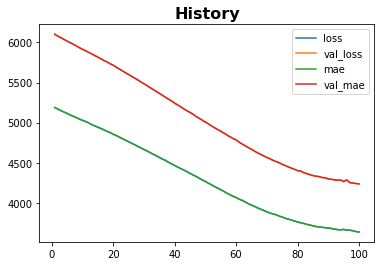

In [81]:
def plotHistory(history):
    x = tf.constant([i+1 for i in range(EPOCHS)])
    
    plt.title("History", fontsize=16, fontweight='bold')
    plt.plot(x, history["loss"], label='loss')
    plt.plot(x, history["val_loss"], label='val_loss')
    
    plt.plot(x, history["mae"], label='mae')
    plt.plot(x, history["val_mae"], label='val_mae')
    
    plt.legend()
    plt.show()
plotHistory(history.history)

### Downloading the notebook

In [85]:
from google.colab import files

files.download('__path__')